## Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler

print("Libraries imported successfully!")

Libraries imported successfully!


## Loading the CTG Dataset

In [2]:
data = pd.read_csv("CTG.csv")
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


## Checking for Duplicate Rows

In [3]:
# Check for duplicate rows
duplicates = data[data.duplicated()]

# Print the duplicate rows (if any)
print("Duplicated rows:\n", duplicates)

# Alternatively, you can just check how many duplicates there are
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Duplicated rows:
      FileName Date SegFile   b   e  LBE  LB  AC  FM  UC  ...   C   D   E  AD  \
2127      NaN  NaN     NaN NaN NaN  NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   

      DE  LD  FS  SUSP  CLASS  NSP  
2127 NaN NaN NaN   NaN    NaN  NaN  

[1 rows x 40 columns]
Number of duplicate rows: 1


In [4]:
# Remove duplicate rows, keeping the first occurrence
data_no_duplicates = data.drop_duplicates()

# Save the cleaned dataframe to a new CSV
data_no_duplicates.to_csv('cleaned_file.csv', index=False)


In [5]:
data.shape

(2130, 40)

## Removing Empty Rows

In [6]:
data.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [7]:
print("Original dataset shape:", data.shape)
df = data.dropna()
print("After removing rows with missing values:", df.shape)
print("Rows removed:", data.shape[0] - df.shape[0])

Original dataset shape: (2130, 40)
After removing rows with missing values: (2126, 40)
Rows removed: 4


## Remove rows there the duration of data collection is less than 10 minutes

CTG (Cardiotocography) monitoring is essential for assessing fetal well-being by tracking the relationship between the fetal heart rate (FHR) and uterine contractions (UC). The data is most reliable when observed for at least 10 minutes. This duration allows clinicians to identify key patterns like variability, accelerations, decelerations, and the baseline heart rate, which are critical for detecting fetal distress.

If the CTG data is shorter than 10 minutes:

Key signals like decelerations or abnormal variability might be missed, leading to false negatives (failing to identify distress).

Shorter data windows may also increase the likelihood of false positives, where non-distress data is flagged as problematic.

For machine learning models, using data with durations under 10 minutes could result in lower performance due to the lack of adequate patterns to train on. Clinical guidelines suggest a minimum of 10 minutes, with some cases recommending 20-30 minutes for more comprehensive monitoring.

In conclusion, 10 minutes is the minimum recommended time for CTG monitoring to ensure accurate detection of fetal distress and reliable predictions for clinical decision-making.

In [8]:
import pandas as pd

# Assuming df is your dataframe with 'b' and 'e' columns containing time in seconds
# If 'b' and 'e' are already integers representing seconds, no need for further conversion.
# If they are in another format (like timedelta), convert them to seconds

# First, ensure 'b' and 'e' are numeric (in seconds)
df['b'] = pd.to_numeric(df['b'], errors='coerce')  # Convert to numeric (if not already)
df['e'] = pd.to_numeric(df['e'], errors='coerce')  # Convert to numeric (if not already)

# Calculate the duration in minutes (seconds / 60)
df['duration'] = (df['e'] - df['b']) / 60  # Duration in minutes

# Check if any rows have a duration less than 10 minutes
short_duration_rows = df[df['duration'] < 10]

# Print rows with duration less than 10 minutes
print("Rows with duration less than 10 minutes:\n", short_duration_rows)

# Optional: Check how many rows have less than 10 minutes
num_short_duration = short_duration_rows.shape[0]
print(f"Number of rows with duration less than 10 minutes: {num_short_duration}")


Rows with duration less than 10 minutes:
             FileName       Date      SegFile       b       e    LBE     LB  \
1       Variab10.txt  12/1/1996  CTG0001.txt   240.0   357.0  120.0  120.0   
24       Mmmfm_1.txt   5/3/1996  CTG0024.txt   510.0   664.0  128.0  128.0   
27       Mmmfm_2.txt   5/3/1996  CTG0027.txt   280.0   477.0  124.0  124.0   
63      S0001081.dat  3/19/1996  CTG0063.txt  1255.0  1557.0  142.0  142.0   
76    S0001089_1.dat   5/2/1996  CTG0076.txt  1341.0  1852.0  154.0  154.0   
...              ...        ...          ...     ...     ...    ...    ...   
2055    S8001041.dsp   6/6/1998  CTG2057.txt  1318.0  1886.0  127.0  127.0   
2112    S8001044.dsp   6/6/1998  CTG2114.txt  1837.0  2297.0  136.0  136.0   
2114    S8001044.dsp   6/6/1998  CTG2116.txt  2252.0  2735.0  136.0  136.0   
2116    S8001045.dsp   6/6/1998  CTG2118.txt     0.0   467.0  140.0  140.0   
2117    S8001045.dsp   6/6/1998  CTG2119.txt   455.0   707.0  140.0  140.0   

       AC   FM   UC  

C:\Users\Kiree\AppData\Local\Temp\ipykernel_17768\493682898.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b'] = pd.to_numeric(df['b'], errors='coerce')  # Convert to numeric (if not already)
C:\Users\Kiree\AppData\Local\Temp\ipykernel_17768\493682898.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['e'] = pd.to_numeric(df['e'], errors='coerce')  # Convert to numeric (if not already)
C:\Users\Kiree\AppData\Local\Temp\ipykernel_17768\493682898.py:12: SettingWithCopyWarning: 
A value is trying 

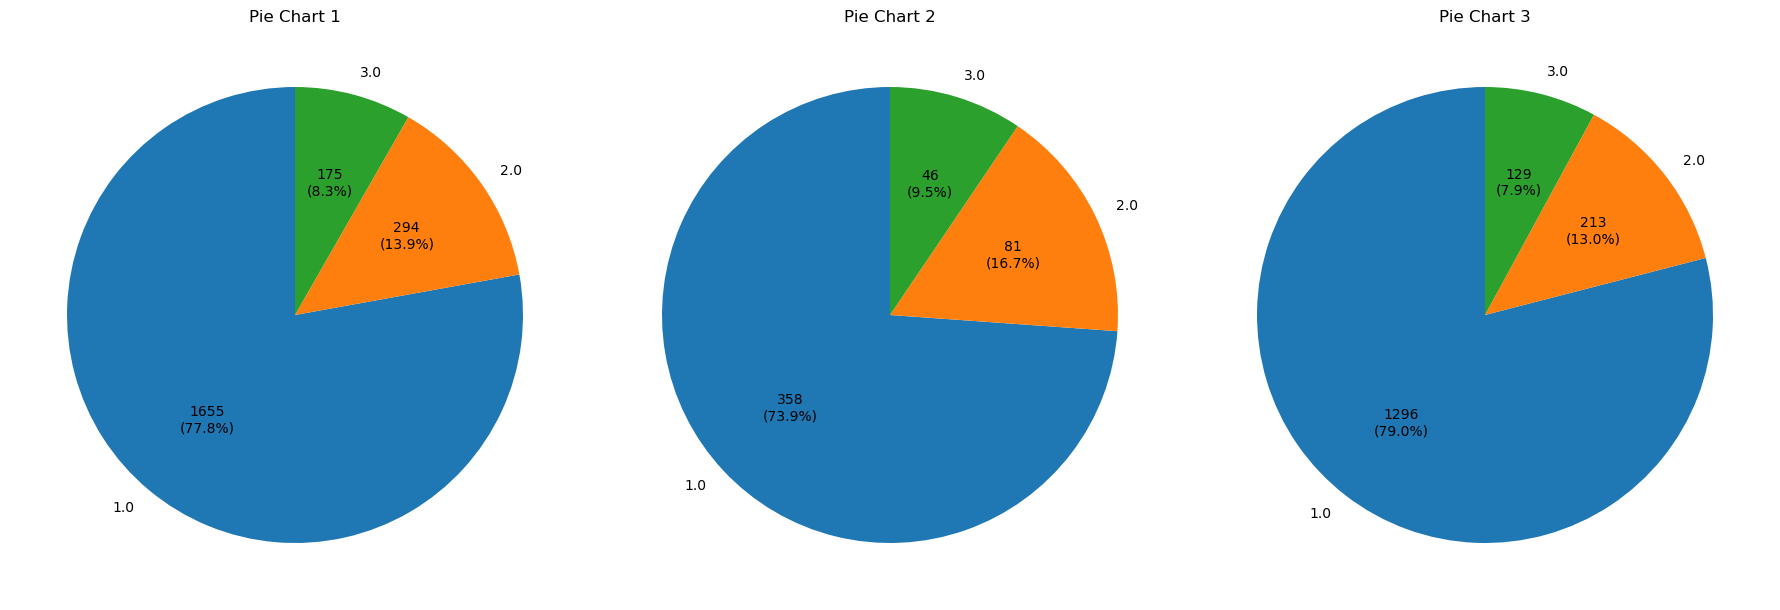

In [10]:
import matplotlib.pyplot as plt

# Sample data for demonstration (you can replace this with your own data)
counts1 = df["NSP"].value_counts() # First dataset
counts2 = short_duration_rows["NSP"].value_counts() # Second dataset
counts3 = df["NSP"].value_counts() - short_duration_rows["NSP"].value_counts()   # Third dataset

# Function to display both count and percentage on the pie chart
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))  # Calculate the absolute count
    return f"{absolute}\n({pct:.1f}%)"  # Return the count and percentage

# Create subplots to display multiple pie charts
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# First pie chart
axes[0].pie(counts1, labels=counts1.index, autopct=lambda pct: func(pct, counts1), startangle=90)
axes[0].set_title('Pie Chart 1')

# Second pie chart
axes[1].pie(counts2, labels=counts2.index, autopct=lambda pct: func(pct, counts2), startangle=90)
axes[1].set_title('Pie Chart 2')

# Third pie chart
axes[2].pie(counts3, labels=counts3.index, autopct=lambda pct: func(pct, counts3), startangle=90)
axes[2].set_title('Pie Chart 3')

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
# Remove rows in 'short_duration_rows' from 'df' based on the 'duration' column condition
df = df[df['duration'] > 10]  # Keep only rows with duration >= 10 minutes

# Optional: Check the new df
print(df.head())  # Check the first few rows of the new df


     FileName      Date      SegFile      b       e    LBE     LB   AC   FM  \
2  Fmcs_1.txt  5/3/1996  CTG0002.txt    5.0   632.0  132.0  132.0  4.0  0.0   
3  Fmcs_1.txt  5/3/1996  CTG0003.txt  177.0   779.0  133.0  133.0  2.0  0.0   
4  Fmcs_1.txt  5/3/1996  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0  0.0   
5  Fmcs_1.txt  5/3/1996  CTG0005.txt  533.0  1147.0  132.0  132.0  4.0  0.0   
6  Fmcs_2.txt  5/3/1996  CTG0006.txt    0.0   953.0  134.0  134.0  1.0  0.0   

     UC  ...    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP   duration  
2   4.0  ...  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  10.450000  
3   5.0  ...  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  10.033333  
4   6.0  ...  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  13.016667  
5   5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  10.233333  
6  10.0  ...  0.0  0.0  0.0  0.0  1.0  0.0   0.0    8.0  3.0  15.883333  

[5 rows x 41 columns]


In [13]:
df.shape


(1638, 41)

## Understanding the Dataset Better

In [14]:
print(df.groupby('NSP').count())

     FileName  Date  SegFile     b     e   LBE    LB    AC    FM    UC  ...  \
NSP                                                                     ...   
1.0      1295  1295     1295  1295  1295  1295  1295  1295  1295  1295  ...   
2.0       213   213      213   213   213   213   213   213   213   213  ...   
3.0       130   130      130   130   130   130   130   130   130   130  ...   

        C     D     E    AD    DE    LD    FS  SUSP  CLASS  duration  
NSP                                                                   
1.0  1295  1295  1295  1295  1295  1295  1295  1295   1295      1295  
2.0   213   213   213   213   213   213   213   213    213       213  
3.0   130   130   130   130   130   130   130   130    130       130  

[3 rows x 40 columns]


#### Drop the following Non-essential Columns: 
- Non-Numeric Data
- Time Instants
- LBE --> Not useful for analysis, used as refrecne only
- DR --> Repetitive decelerations (Not useful for analysis)

In [17]:
drop_cols = ["FileName", "SegFile", "Date", "b", "e", "LBE", "DR"]
drop_cols = [c for c in drop_cols if c in df.columns]
if drop_cols:
    df = df.drop(columns=drop_cols)
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS',
       'SUSP', 'CLASS', 'NSP', 'duration'],
      dtype='object')

In [32]:
#STATISTICS ABOUT ATTRIBUTES
df_without_target = df.drop(columns=['NSP'])
statistics = df_without_target.describe()
transpStat = statistics.transpose()
transpStat = transpStat.drop(['count'], axis =1)

skew = df_without_target.skew()
kurt = df_without_target.kurt()
transpStat['skewness'] = skew
transpStat['kurtosis'] = kurt

transpStat

,mean,std,min,25%,50%,75%,max,skewness,kurtosis
LB,133.365079,9.788468,106.000000,127.000000,133.0,140.000,160.000000,-0.026343,-0.160656
AC,3.197802,3.801578,0.000000,0.000000,2.0,5.000,26.000000,1.436692,2.221737
FM,7.901709,40.106815,0.000000,0.000000,0.0,2.000,564.000000,9.127203,96.064687
UC,4.213675,2.897054,0.000000,2.000000,4.0,6.000,23.000000,0.672798,1.184112
ASTV,48.048230,16.658729,12.000000,34.000000,51.0,62.000,87.000000,-0.101710,-1.042582
MSTV,1.347436,0.873126,0.200000,0.700000,1.2,1.700,7.000000,1.681089,5.140353
ALTV,9.625763,18.034407,0.000000,0.000000,0.0,10.000,91.000000,2.242030,4.578115
MLTV,8.095421,5.576229,0.000000,4.600000,7.3,10.600,50.700000,1.490288,5.243828
DL,1.789988,2.679563,0.000000,0.000000,0.0,3.000,16.000000,1.634718,2.307019
DS,0.004274,0.065252,0.000000,0.000000,0.0,0.000,1.000000,15.212760,229.708540


## Visulizing data on a Histogram

In [35]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_histograms(df: pd.DataFrame, ncols: int = 4, bins: str | int = "fd",
                        exclude: list[str] = None, rotate_xticks: bool = True):
    """
    Plot a grid of histograms for numeric columns and bar charts for categorical/ordinal ones.
    - bins="fd" (Freedman–Diaconis) adapts to skewed data; use an int (e.g., 30) if you prefer.
    - exclude: columns to skip (IDs like 'FileName', or derived labels like 'CLASS','SUSP','FS').
    """
    exclude = exclude or []
    cols = [c for c in df.columns if c not in exclude]

    # Separate by dtype; treat NSP specially (ordinal encoded as numbers)
    num_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
    cat_cols = [c for c in cols if c not in num_cols]
    if "NSP" in num_cols:   # show as categorical counts for clarity
        num_cols.remove("NSP")
        cat_cols.append("NSP")

    # ---- Numeric histograms ----
    if num_cols:
        n = len(num_cols)
        nrows = math.ceil(n / ncols)
        fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
        axes = np.array(axes).reshape(-1)
        for i, col in enumerate(num_cols):
            ax = axes[i]
            data = df[col].dropna()
            ax.hist(data, bins=bins)
            ax.set_title(col)
            ax.grid(alpha=0.2)
        for j in range(i+1, len(axes)):  # hide unused slots
            axes[j].set_visible(False)
        fig.suptitle("Numeric features — histograms", y=1.02, fontsize=12)
        fig.tight_layout()
        plt.show()

    # ---- Categorical/ordinal counts (incl. NSP) ----
    if cat_cols:
        n = len(cat_cols)
        nrows = math.ceil(n / ncols)
        fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
        axes = np.array(axes).reshape(-1)
        for i, col in enumerate(cat_cols):
            ax = axes[i]
            counts = df[col].astype("category").value_counts(dropna=False).sort_index()
            ax.bar([str(x) for x in counts.index], counts.values)
            ax.set_title(col)
            if rotate_xticks:
                for tick in ax.get_xticklabels():
                    tick.set_rotation(45)
                    tick.set_ha("right")
            ax.grid(axis="y", alpha=0.2)
        for j in range(i+1, len(axes)):
            axes[j].set_visible(False)
        fig.suptitle("Categorical / ordinal features — counts", y=1.02, fontsize=12)
        fig.tight_layout()
        plt.show()


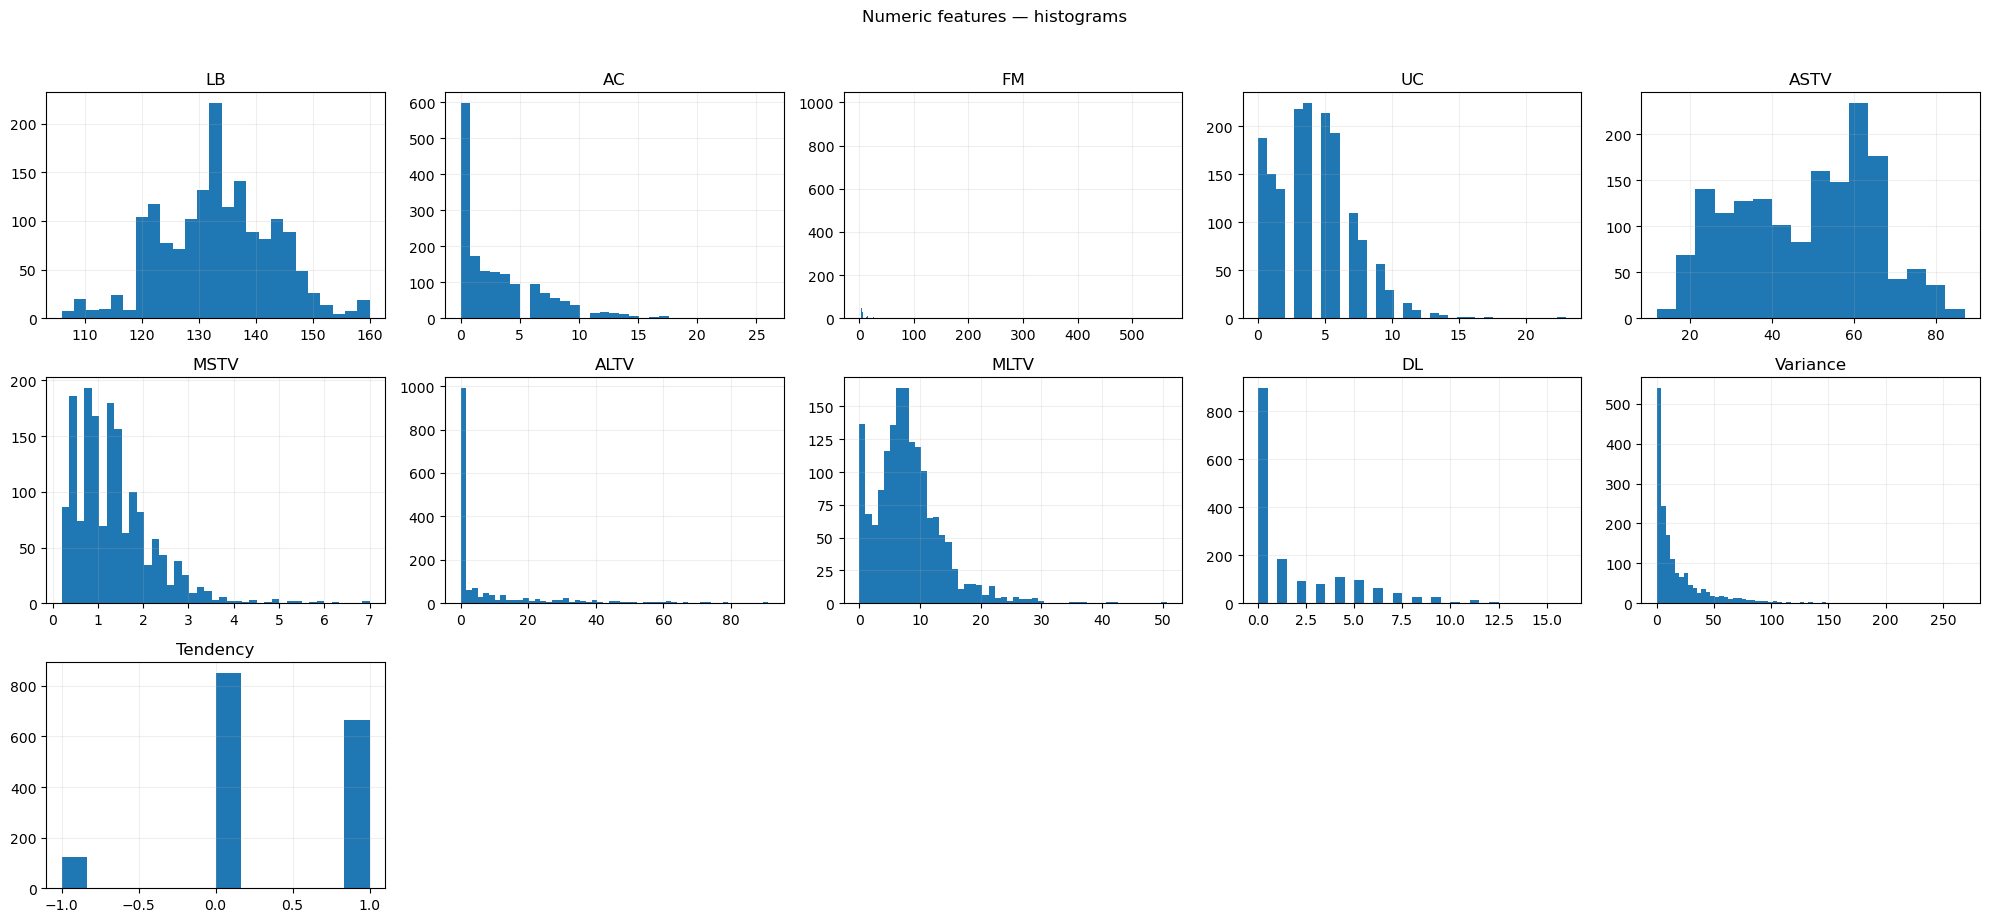

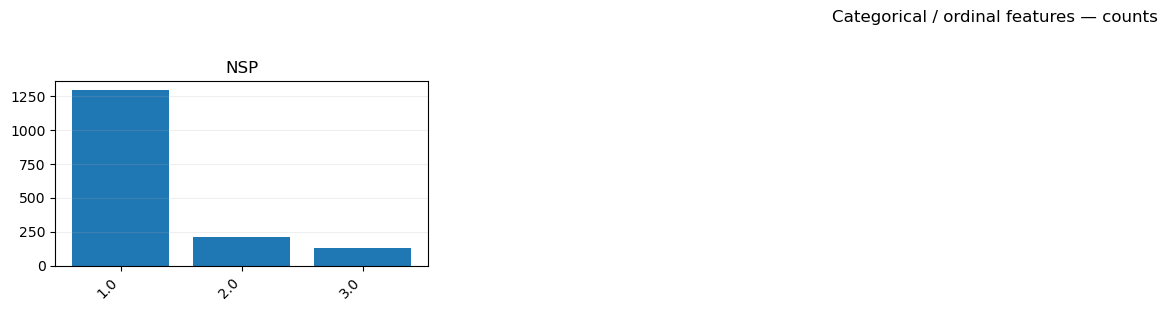

In [37]:
# Common to exclude ID/derived columns from plots:
exclude_cols = ["Min","Max", "NMax", "Nzeros", "Mode", "Mean", "Median", "CLASS", "SUSP", "FS", "DS", "DP", "Width", "Nmax", "A", "B", "C", "D", "E", "AD", "DE", "LD", "duration"]  # drop any that don’t exist
plot_all_histograms(df, ncols=5, bins="fd", exclude=exclude_cols)


## Understanding the correlation between different features

### Spearman correlation

Spearman works with ranks and is fine for ordinal data.

It checks whether higher NSP values (e.g., going from Normal → Suspicious → Pathological) are associated with increases/decreases in your numerical features.

In [48]:
exclude_cols = [c for c in exclude_cols if c in df.columns]
if exclude_cols:
    df1 = df.drop(columns=exclude_cols)
df1.columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'Variance', 'Tendency', 'NSP'],
      dtype='object')

In [50]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS',
       'SUSP', 'CLASS', 'NSP', 'duration'],
      dtype='object')

In [49]:
spearman_corr = df1.corr(method="spearman")["NSP"].drop("NSP")
print(spearman_corr)


LB          0.194811
AC         -0.482260
FM          0.053254
UC         -0.214189
ASTV        0.450859
MSTV       -0.244545
ALTV        0.364997
MLTV       -0.169244
DL         -0.031122
Variance   -0.135543
Tendency   -0.064330
Name: NSP, dtype: float64


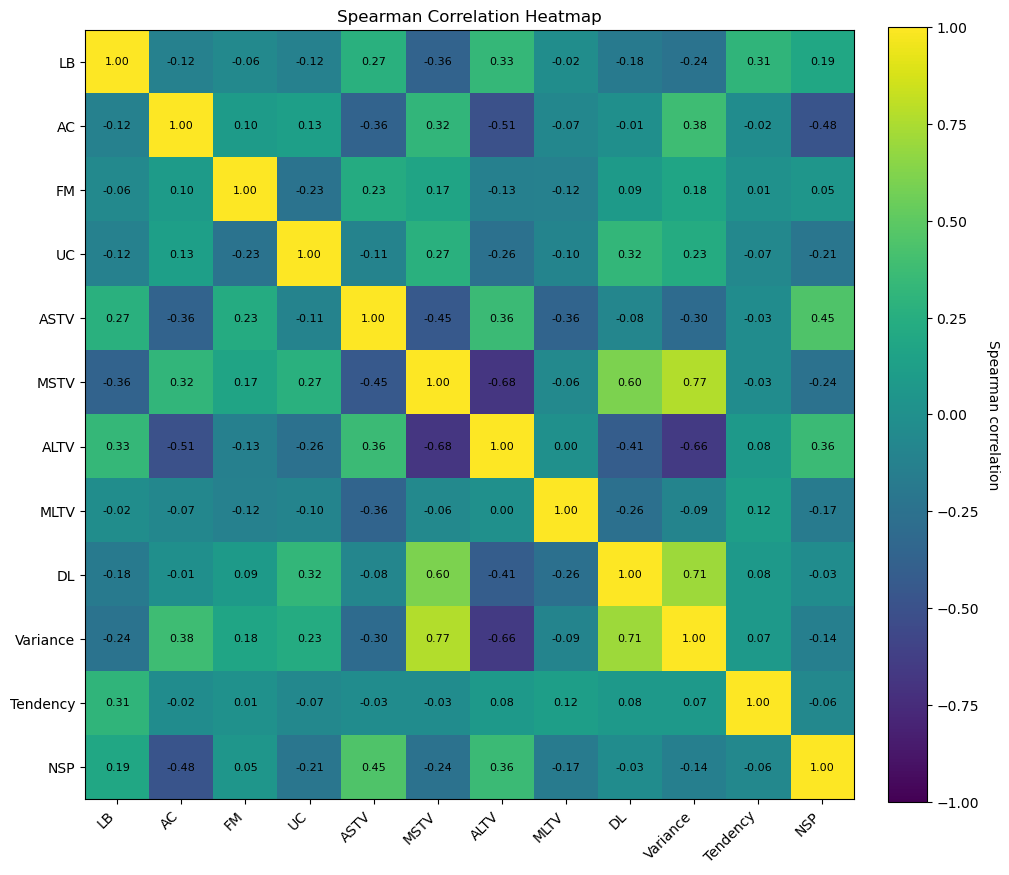

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keep only numeric columns (so NSP is included)
df_num = df1.select_dtypes(include="number")

# Spearman correlation (good for ordinal NSP)
corr = df_num.corr(method="spearman")

# ---- Plot heatmap (matplotlib only) ----
fig, ax = plt.subplots(figsize=(0.6*len(corr.columns)+3, 0.6*len(corr.columns)+3))

im = ax.imshow(corr.values, vmin=-1, vmax=1)

# Axis ticks & labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticks(np.arange(len(corr.index)))
ax.set_yticklabels(corr.index)

# Colorbar
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Spearman correlation", rotation=270, labelpad=15)

# Optional: annotate each cell with the correlation value
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", fontsize=8)

ax.set_title("Spearman Correlation Heatmap")
plt.tight_layout()
plt.show()


## Classification and Model Training

If your ultimate goal is to predict NSP from other variables, you might treat this as a classification problem and use:

Decision trees / Random Forest → feature_importances_

Logistic regression (multinomial) → coefficients

Mutual information → sklearn.feature_selection.mutual_info_classif

In [57]:
from sklearn.feature_selection import mutual_info_classif

X = df1.drop(columns=["NSP"])
y = df["NSP"]

mi = mutual_info_classif(X, y, discrete_features=False)
importance = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(importance)


MSTV        0.200022
ALTV        0.187133
ASTV        0.159163
AC          0.158103
LB          0.130912
Variance    0.121138
MLTV        0.088701
UC          0.060375
DL          0.050810
FM          0.020713
Tendency    0.013549
dtype: float64


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_scaled, y)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [59]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix

# ---------- 1) Custom transformer: IQR outlier clipper ----------
class IQRClipper(BaseEstimator, TransformerMixin):
    """
    Clip numeric features to [Q1 - k*IQR, Q3 + k*IQR] per column.
    Works on numpy arrays coming from ColumnTransformer.
    """
    def __init__(self, k=1.5):
        self.k = k
        self.lower_ = None
        self.upper_ = None

    def fit(self, X, y=None):
        X = np.asarray(X, dtype=float)
        q1 = np.nanpercentile(X, 25, axis=0)
        q3 = np.nanpercentile(X, 75, axis=0)
        iqr = q3 - q1
        self.lower_ = q1 - self.k * iqr
        self.upper_ = q3 + self.k * iqr
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return np.clip(X, self.lower_, self.upper_)

# ---------- 2) Split ----------
TARGET = "NSP"  # 1=Normal, 2=Suspicious, 3=Pathological
assert TARGET in df1.columns, f"{TARGET} not in DataFrame"

X = df1.drop(columns=[TARGET])
y = df1[TARGET].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---------- 3) Column typing ----------
num_cols = X_train.select_dtypes(include=["number", "bool"]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=["number", "bool"]).columns.tolist()

# ---------- 4) Preprocess pipelines ----------
numeric_pipe = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    # optional: stabilise skew without forcing standardisation yet
    ("yeo_johnson", PowerTransformer(method="yeo-johnson", standardize=False)),
    ("clip", IQRClipper(k=1.5)),           # cap extreme outliers
    ("scale", StandardScaler())            # homogenize scale (mean 0, std 1)
])

categorical_pipe = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols)
    ],
    remainder="drop"
)

# ---------- 5) Example model plugged after preprocessing ----------
clf = LogisticRegression(
    multi_class="multinomial", solver="saga",
    max_iter=2000, n_jobs=-1, class_weight="balanced", random_state=42
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", clf)
])

# ---------- 6) Train & evaluate ----------
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Balanced accuracy:", round(balanced_accuracy_score(y_test, y_pred), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_test, y_pred))


C:\Users\Kiree\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Balanced accuracy: 0.7444

Classification report:
               precision    recall  f1-score   support

           1     0.9496    0.8726    0.9095       259
           2     0.5692    0.8605    0.6852        43
           3     0.5200    0.5000    0.5098        26

    accuracy                         0.8415       328
   macro avg     0.6796    0.7444    0.7015       328
weighted avg     0.8657    0.8415    0.8484       328

Confusion matrix (rows=true, cols=pred):
 [[226  24   9]
 [  3  37   3]
 [  9   4  13]]


C:\Users\Kiree\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
